### Riddler Express: 

In NCAA men’s basketball, when a team has committed between six and eight fouls in a half, the opposing team is “in the bonus.” This means that the next time they are fouled while not in the act of shooting, they get to shoot at least one free throw. If the player makes that first free throw, they get to shoot a second.

If either free throw is missed, one team will rebound the ball, and play will continue with the rebounding team in possession.

Assume that an average team scores exactly 1 point per offensive possession, a figure that accounts for multiple shots if the team rebounds its own miss (or misses) on a single trip, and that it rebounds 15 percent of its own missed free throws.

Now suppose you are the coach of a team playing an average opponent that’s in the bonus. The other team has the ball, the game is tight, and you want to minimize the expected number of points your opponent will earn on this particular possession. How low does the ball-handler’s free throw shooting percentage need to be for you to instruct your team to foul that player (when they are not in the act of shooting)?

#### Assumptions for Analytical:

- Team is in the bonus
- Expected points each trip: 1
- Rebound % = 15%
- Equation for expected points when shooting: `p` = free throw percentage
    - make both (2 pts): `2*p*p` 
    - make first, miss second & miss rebound (1 pt): `1*p*(1-p)(1-r)`
    - make first, miss second & get rebound (2 pts given expected val): `2*p*(1-p)*r`
    - miss first, miss rebound (0 pts): `(1-p)(1-r)`
    - miss first, get reboudn(1 pt): `(1-p)*r`
    
- We want to determine what `p` drops expected points below 1:
    - `expts(P) = 2p^2 + 1*p*(1-p)(1-r) + 2*p*(1-p)*r + (1-p)(1-r) + p*r`

In [1]:
import numpy as np 
from matplotlib import pyplot as plt

def expected_value(p, r):
    """Solve for expected value based on p & r"""
    return 2*(p*p) + 1*p*(1-p)*(1-r) + 2*p*(1-p)*r + 0*(1-p)*(1-r) + (1-p)*r

def fastApply(x, r):
    """Apply function to vector of values"""
    return np.array([expected_value(xi, r) for xi in x])

In [2]:
# array of FT %
p_array = np.arange(0,1,0.0001)
p_array = np.flip(p_array)

# apply func
exp_vals = fastApply(p_array, .15)

# find the first time we dip below 1 (much faster than sifting through list)
idx = np.argmax(exp_vals < 1)

# check solution...look at the step prior also to confirm it is >= 1:
print(f"Once an opponent shoots below {100 * p_array[idx]:.2f}%, start fouling.")
print(f"When they shot {100 * p_array[idx-1]:.2f}%, their expected pts were {exp_vals[idx-1]}.")

Once an opponent shoots below 57.19%, start fouling.
When they shot 57.20%, their expected pts were 1.0001064000000002.


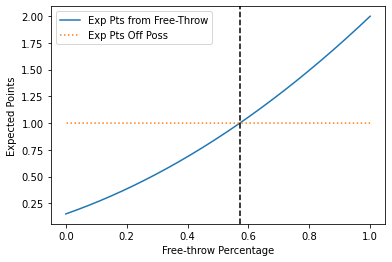

In [3]:
### plot it out, for fun. 
plt.plot(p_array, exp_vals, label = 'Exp Pts from Free-Throw')
plt.plot(p_array, np.array([1 for i in range(len(p_array))]), label = 'Exp Pts Off Poss', ls = ':')
plt.axvline(x=p_array[idx], ls = '--', color = 'black')
plt.xlabel("Free-throw Percentage")
plt.ylabel("Expected Points")
plt.legend()
plt.show()

#### My code is slower than it could be

My operation wasn't vectorized, was still using a list comprehension in `fastApply`, which means iterating through all values even when an answer is found.

Another option to try is using some of the tools in itertools.

In [11]:
import time
start = time.time()
p_array = np.arange(0,1,0.0001)
p_array = np.flip(p_array)
exp_vals = fastApply(p_array, .15)
idx = np.argmax(exp_vals < 1)
end = time.time()
print(end - start)

0.05971050262451172


In [12]:
start = time.time()
p_array = np.arange(0,1,0.0001)
p_array = np.flip(p_array)
for p in p_array:
    if expected_value(p=p, r=0.15) < 1:
        print(p)
        break

end = time.time()
print(end - start)

0.5719000000000001
0.024012088775634766
